In [29]:
from utils import *
from modules import *
import numpy as np 
import pandas as pd
from PIL import Image
import os
from os import listdir


import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import rand_score,adjusted_rand_score

from resizeimage import resizeimage
from scipy.ndimage import rotate
from time import time

import warnings
warnings.filterwarnings("ignore")

# 1. Données Signatures

In [3]:
def rotate_image(img, angle):
    return rotate(img, angle, reshape=False, cval=255)

In [4]:
def get_signatures(test=False):
    
    type_data = "Train"
    if test:
        type_data = "Test"
        
    folder_dir = f"data/signature/{type_data}"
    
    X = []
    y = []
    
    new_size = (28, 28)
    
    i = 0
    for person in os.listdir(folder_dir):
        
        for path in os.listdir(f"{folder_dir}/{person}"):
            img = Image.open(f"{folder_dir}/{person}/{path}")
            img = np.array(resizeimage.resize_contain(img, [75, 75]))[:,:,0:3].reshape(-1, 3)
            
            X.append(img)
            y.append(i)
            
            img_r = rotate_image(img.reshape(75, 75, 3), 90).reshape(-1, 3)
            X.append(img_r)
            y.append(i)
        
            img_r = rotate_image(img.reshape(75, 75, 3), 180).reshape(-1, 3)
            X.append(img_r)
            y.append(i)
            
            img_r = rotate_image(img.reshape(75, 75, 3), 270).reshape(-1, 3)
            X.append(img_r)
            y.append(i)
            
            img_r = rotate_image(img.reshape(75, 75, 3), 45).reshape(-1, 3)
            X.append(img_r)
            y.append(i)
            
            img_r = rotate_image(img.reshape(75, 75, 3), 135).reshape(-1, 3)
            X.append(img_r)
            y.append(i)
            
            img_r = rotate_image(img.reshape(75, 75, 3), 225).reshape(-1, 3)
            X.append(img_r)
            y.append(i)
            
            img_r = rotate_image(img.reshape(75, 75, 3), 315).reshape(-1, 3)
            X.append(img_r)
            y.append(i)
            
        i += 1

    X = np.array(X)
    y = np.array(y)
    
    indices = np.random.permutation(len(X))
    return X[indices], y[indices]

In [34]:
X_train, Y_train = get_signatures()

X_train = normalisation(X_train)
X_train = X_train.astype("float64")
X_test, Y_test = get_signatures(test=True)
X_test = normalisation(X_test)
X_test = X_test.astype("float64")

  7%|██▊                                       | 10/150 [02:52<39:53, 17.10s/it]

Epoch 10/30 - Loss: 1.5202555860240894


 13%|█████▌                                    | 20/150 [06:01<41:10, 19.01s/it]

Epoch 20/30 - Loss: 1.472292141039896


 20%|████████▍                                 | 30/150 [09:05<36:19, 18.16s/it]

Epoch 30/30 - Loss: 1.4289205980047264


 27%|███████████▏                              | 40/150 [11:46<29:41, 16.19s/it]

Epoch 40/30 - Loss: 1.385769365655468


 33%|██████████████                            | 50/150 [14:26<26:45, 16.05s/it]

Epoch 50/30 - Loss: 1.3386933453451557


 40%|████████████████▊                         | 60/150 [17:04<23:40, 15.78s/it]

Epoch 60/30 - Loss: 1.2877723254548747


 47%|███████████████████▌                      | 70/150 [19:51<22:48, 17.10s/it]

Epoch 70/30 - Loss: 1.2443014220011772


 53%|██████████████████████▍                   | 80/150 [22:38<19:31, 16.74s/it]

Epoch 80/30 - Loss: 1.2212163014932915


 60%|█████████████████████████▏                | 90/150 [25:32<17:34, 17.57s/it]

Epoch 90/30 - Loss: 1.2156866525002739


 67%|███████████████████████████▎             | 100/150 [28:26<15:10, 18.22s/it]

Epoch 100/30 - Loss: 1.1794735198391457


 73%|██████████████████████████████           | 110/150 [31:09<10:56, 16.42s/it]

Epoch 110/30 - Loss: 1.1699040849375864


 80%|████████████████████████████████▊        | 120/150 [33:58<08:16, 16.55s/it]

Epoch 120/30 - Loss: 1.1737370851430153


 87%|███████████████████████████████████▌     | 130/150 [36:40<05:29, 16.49s/it]

Epoch 130/30 - Loss: 1.1432500163163595


 93%|██████████████████████████████████████▎  | 140/150 [39:25<02:40, 16.07s/it]

Epoch 140/30 - Loss: 1.139889162854485


100%|█████████████████████████████████████████| 150/150 [42:04<00:00, 16.83s/it]

Epoch 150/30 - Loss: 1.1178262347377745


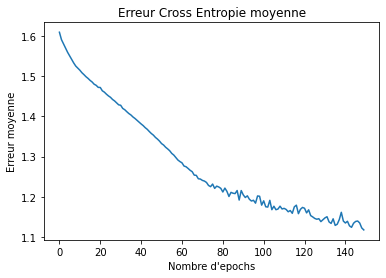

Accuracy  :  0.87625
CNN sur les données signature
Optimisation finie au bout de  42  min


In [6]:
cnn_signa = Sequentiel([
    Conv1D(k_size=2, chan_in=3, chan_out=16, stride=3, init="xavier"),
    MaxPool1D(2, 3), 
    Flatten(),
    ModuleLineaire(10_000, 100, init="xavier"),
    ReLU(),
    ModuleLineaire(100, 5, init="xavier"),
    SoftMax()
])

opti = Optim(cnn_signa,CrossEntropieLoss(5), eps=1e-5)
tac = time()
opti.SGD(X_train, Y_train, taille_batch=30, nb_epochs=150, verbose=True)
tic = time()
opti.affichage(X_train,Y_train)
print("CNN sur les données signature")
print("Optimisation finie au bout de ",int((tic-tac)/60)," min")

In [8]:
net_to_graph(opti.getNetwork(), net_name="networks_images/network_CNN_signa", horizontal=True)

In [9]:
print("CNN sur les données signature")

print("Accuracy sur le train",opti.getNetwork().accuracy(X_train,Y_train))
print("Accuracy sur le test",opti.getNetwork().accuracy(X_test,Y_test))

CNN sur les données signature
Accuracy sur le train 0.87625
Accuracy sur le test 0.78125


In [41]:
X_train, Y_train = get_signatures()

X_train = normalisation(X_train)
X_train = X_train.astype("float64")
X_test, Y_test = get_signatures(test=True)
X_test = normalisation(X_test)
X_test = X_test.astype("float64")

In [40]:
nb_classes = 5

Y_pred = opti.getNetwork().predict(X_train,nb_classes)

X_train = X_train.reshape(X_train.shape[0],-1)

kmeans = KMeans(n_clusters=nb_classes, random_state=0, max_iter=1000).fit(X_train)
yhat = kmeans.labels_

y_cluster_pred = np.zeros(len(X_train))
indices = np.arange(len(X_train))

for cluster in range(nb_classes):

    vals, counts = np.unique(Y_train[yhat == cluster], return_counts=True)
    val_maj = vals[np.argmax(counts)]

    y_cluster_pred[indices[yhat == cluster]] = val_maj

    
y_cluster_pred = np.array(y_cluster_pred.astype("int"))


print("TRAIN\n")
print("Purete du clustering de Kmeans sur les labels USPS : ",cluster_purity(Y_train,y_cluster_pred))
print("Purete du clustering de Kmeans sur les labels prédits par le CNN : ",cluster_purity(Y_pred,y_cluster_pred))

print()

print("Rand_score du clustering de Kmeans sur les labels USPS : ",rand_score(Y_train,y_cluster_pred))
print("Rand_score du clustering de Kmeans sur les labels prédits par le CNN : ",rand_score(Y_pred,y_cluster_pred))

print("--------------------------------------------")



Y_pred = opti.getNetwork().predict(X_test,nb_classes)

X_test = X_test.reshape(X_test.shape[0],-1)

kmeans = KMeans(n_clusters=10, random_state=0, max_iter=1000).fit(X_test)
yhat = kmeans.labels_

y_cluster_pred = np.zeros(len(X_test))
indices = np.arange(len(X_test))

for cluster in range(nb_classes):

    vals, counts = np.unique(Y_test[yhat == cluster], return_counts=True)
    val_maj = vals[np.argmax(counts)]

    y_cluster_pred[indices[yhat == cluster]] = val_maj

y_cluster_pred = np.array(y_cluster_pred.astype("int"))

print("\nTEST\n")
print("Purete du clustering de Kmeans sur les labels USPS : ",cluster_purity(Y_test,y_cluster_pred))
print("Purete du clustering de Kmeans sur les labels prédits par le CNN: ",cluster_purity(y_cluster_pred,Y_pred,nb_classes))

print()

print("Rand_score du clustering de Kmeans sur les labels USPS : ",rand_score(Y_test,y_cluster_pred))
print("Rand_score du clustering de Kmeans sur les labels prédits par le CNN : ",rand_score(y_cluster_pred,Y_pred))


TRAIN

Purete du clustering de Kmeans sur les labels USPS :  0.385625
Purete du clustering de Kmeans sur les labels prédits par le CNN :  0.35375

Rand_score du clustering de Kmeans sur les labels USPS :  0.6610451844903065
Rand_score du clustering de Kmeans sur les labels prédits par le CNN :  0.6391174171357098
--------------------------------------------

TEST

Purete du clustering de Kmeans sur les labels USPS :  0.3
Purete du clustering de Kmeans sur les labels prédits par le CNN:  0.565625

Rand_score du clustering de Kmeans sur les labels USPS :  0.5627547021943574
Rand_score du clustering de Kmeans sur les labels prédits par le CNN :  0.5598354231974921


In [37]:
X_train, Y_train = get_signatures()

X_train = normalisation(X_train)
X_train = X_train.astype("float64")
X_test, Y_test = get_signatures(test=True)
X_test = normalisation(X_test)
X_test = X_test.astype("float64")

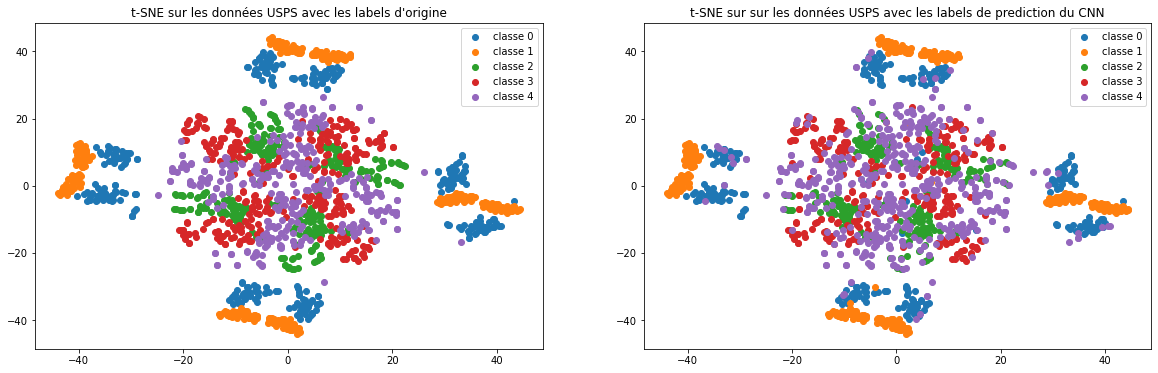

In [43]:
yhat = opti.getNetwork().predict(X_train,nb_classes)

X_train = X_train.reshape(X_train.shape[0],-1)

tsne = TSNE(n_components=2, init='pca',n_iter=500,random_state=0, verbose=0)
X_train_tsne = tsne.fit_transform(X_train)

colors = {i: plt.cm.tab10(i) for i in range(10)}

fig = plt.figure(figsize=(20,6))

plt.subplot(121)

for c in range(nb_classes):
    plt.scatter(X_train_tsne[:,0][Y_train == c],X_train_tsne[:,1][Y_train == c],color=colors[c],label=f"classe {c}")
    
plt.title("t-SNE sur les données de train USPS avec les labels d'origine")
plt.legend()
plt.subplot(122)

y_cluster_pred = np.zeros(len(X_train))
indices = np.arange(len(X_train))

for cluster in range(nb_classes):

    vals, counts = np.unique(Y_train[yhat == cluster], return_counts=True)
    val_maj = vals[np.argmax(counts)]
    
    y_cluster_pred[indices[yhat == cluster]] = val_maj
    
    
colors = {i: plt.cm.tab10(i) for i in range(10)}
for c in range(nb_classes):
    plt.scatter(X_train_tsne[:,0][y_cluster_pred == c],X_train_tsne[:,1][y_cluster_pred == c],color=colors[c],label=f"classe {c}")
    
plt.title("t-SNE sur sur les données de train USPS avec les labels de prediction du CNN")
plt.legend()
    
plt.show()

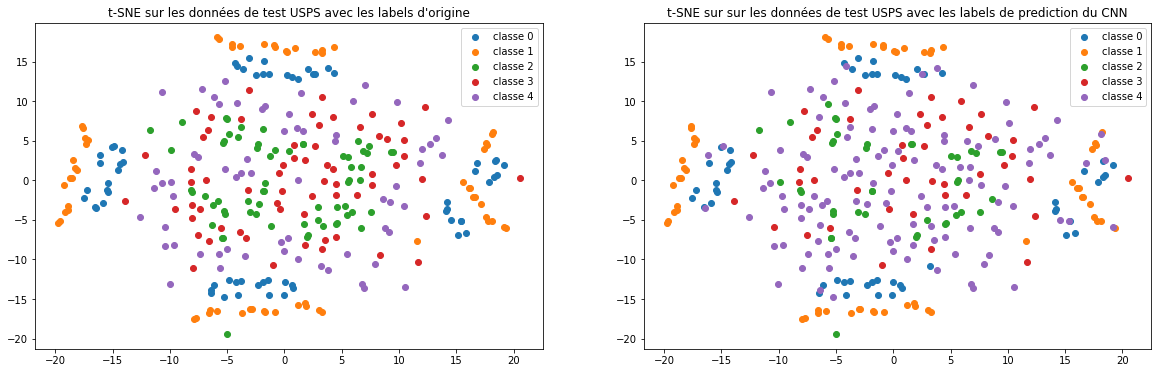

In [44]:
yhat = opti.getNetwork().predict(X_test,nb_classes)

X_test = X_test.reshape(X_test.shape[0],-1)

tsne = TSNE(n_components=2, init='pca',n_iter=500,random_state=0, verbose=0)
X_test_tsne = tsne.fit_transform(X_test)

colors = {i: plt.cm.tab10(i) for i in range(10)}

fig = plt.figure(figsize=(20,6))

plt.subplot(121)

for c in range(nb_classes):
    plt.scatter(X_test_tsne[:,0][Y_test == c],X_test_tsne[:,1][Y_test == c],color=colors[c],label=f"classe {c}")
    
plt.title("t-SNE sur les données de test USPS avec les labels d'origine")
plt.legend()
plt.subplot(122)

y_cluster_pred = np.zeros(len(X_test))
indices = np.arange(len(X_test))

for cluster in range(nb_classes):

    vals, counts = np.unique(Y_test[yhat == cluster], return_counts=True)
    val_maj = vals[np.argmax(counts)]
    
    y_cluster_pred[indices[yhat == cluster]] = val_maj
    
    
colors = {i: plt.cm.tab10(i) for i in range(10)}
for c in range(nb_classes):
    plt.scatter(X_test_tsne[:,0][y_cluster_pred == c],X_test_tsne[:,1][y_cluster_pred == c],color=colors[c],label=f"classe {c}")
    
plt.title("t-SNE sur sur les données de test USPS avec les labels de prediction du CNN")
plt.legend()
    
plt.show()